In [50]:
# Importing all the Required Libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
import json
import os
import itertools
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [53]:

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    total_samples = np.sum(cm)
    cm_percentages = cm / total_samples * 100

    # Scaling the figure size
    default_size = (6, 4) # Default size (width, height) in inches
    scale_factor = 0.85
    scaled_size = (default_size[0] * scale_factor, default_size[1] * scale_factor)
    plt.figure(figsize=scaled_size)

    plt.imshow(cm_percentages, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        cell_value = f'{cm[i, j]} ({cm_percentages[i, j]:.2f}%)'
        plt.text(j, i, cell_value,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

accuracy = 0.82
cm = np.array([[1992, 220], [315, 473]])
precision = 0.68
recall = 0.60
fp_rate = 0.10

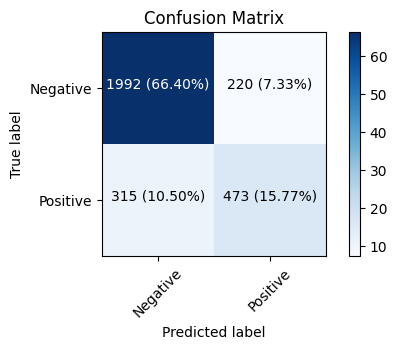

In [54]:
# def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
#     total_samples = np.sum(cm)
#     cm_percentages = cm / total_samples * 100
    

    
#     plt.imshow(cm_percentages, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         cell_value = f'{cm[i, j]} ({cm_percentages[i, j]:.2f}%)'
#         plt.text(j, i, cell_value,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     plt.show()

# Example usage
cm = np.array([[1992, 220], [315, 473]])
plot_confusion_matrix(cm, ['Negative', 'Positive'], 'Confusion Matrix')

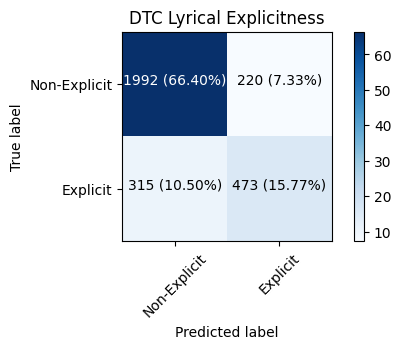

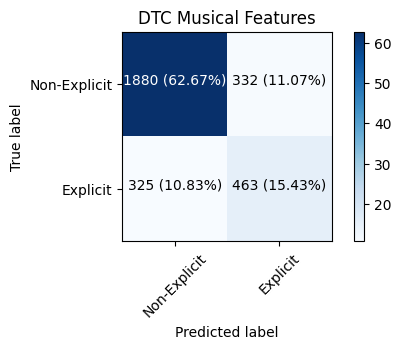

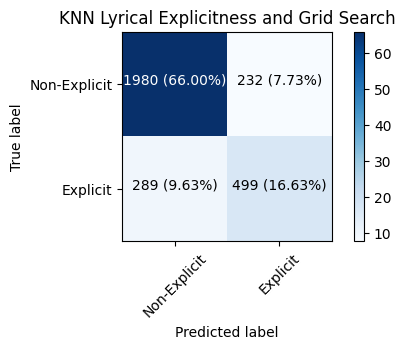

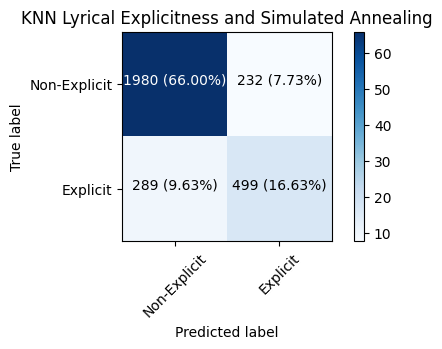

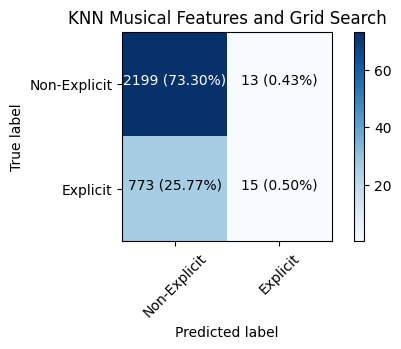

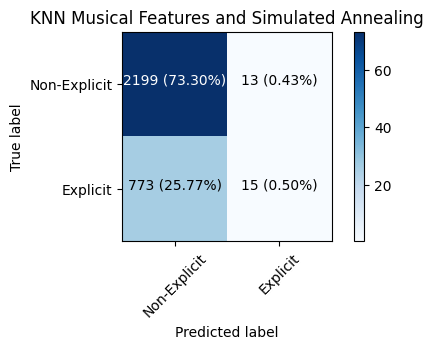

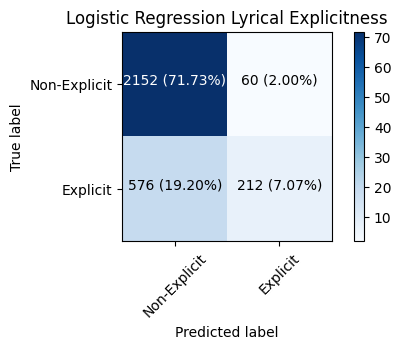

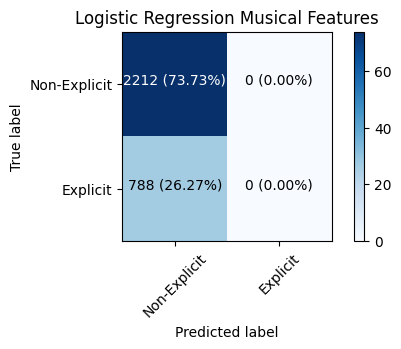

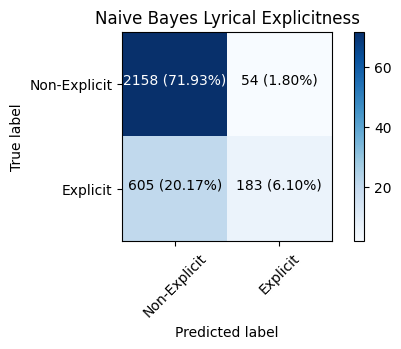

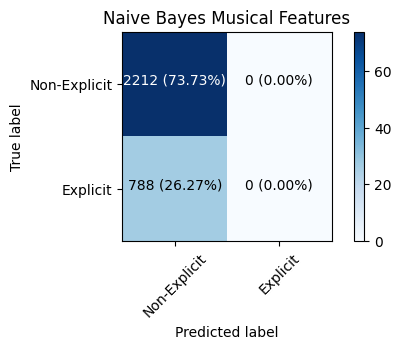

In [55]:

dtc1 = np.array([[1992, 220], [315, 473]])
plot_confusion_matrix(dtc1, classes=['Non-Explicit', 'Explicit'], title='DTC Lyrical Explicitness')
dtc2 = np.array([[1880, 332], [325, 463]])
plot_confusion_matrix(dtc2, classes=['Non-Explicit', 'Explicit'], title='DTC Musical Features')
knn1 = np.array([[1980, 232], [289, 499]])
plot_confusion_matrix(knn1, classes=['Non-Explicit', 'Explicit'], title='KNN Lyrical Explicitness and Grid Search')
knn2 = np.array([[1980, 232], [289, 499]])
plot_confusion_matrix(knn2, classes=['Non-Explicit', 'Explicit'], title='KNN Lyrical Explicitness and Simulated Annealing')
knn3 = np.array([[2199, 13], [773, 15]])
plot_confusion_matrix(knn3, classes=['Non-Explicit', 'Explicit'], title='KNN Musical Features and Grid Search')
knn4 = np.array([[2199, 13], [773, 15]])
plot_confusion_matrix(knn4, classes=['Non-Explicit', 'Explicit'], title='KNN Musical Features and Simulated Annealing')
logr1 = np.array([[2152, 60], [576, 212]])
plot_confusion_matrix(logr1, classes=['Non-Explicit', 'Explicit'], title='Logistic Regression Lyrical Explicitness')
logr2 = np.array([[2212, 0], [788, 0]])
plot_confusion_matrix(logr2, classes=['Non-Explicit', 'Explicit'], title='Logistic Regression Musical Features')
naib1 = np.array([[2158, 54], [605, 183]])
plot_confusion_matrix(naib1, classes=['Non-Explicit', 'Explicit'], title='Naive Bayes Lyrical Explicitness')
naib2 = np.array([[2212, 0], [788, 0]])
plot_confusion_matrix(naib2, classes=['Non-Explicit', 'Explicit'], title='Naive Bayes Musical Features')



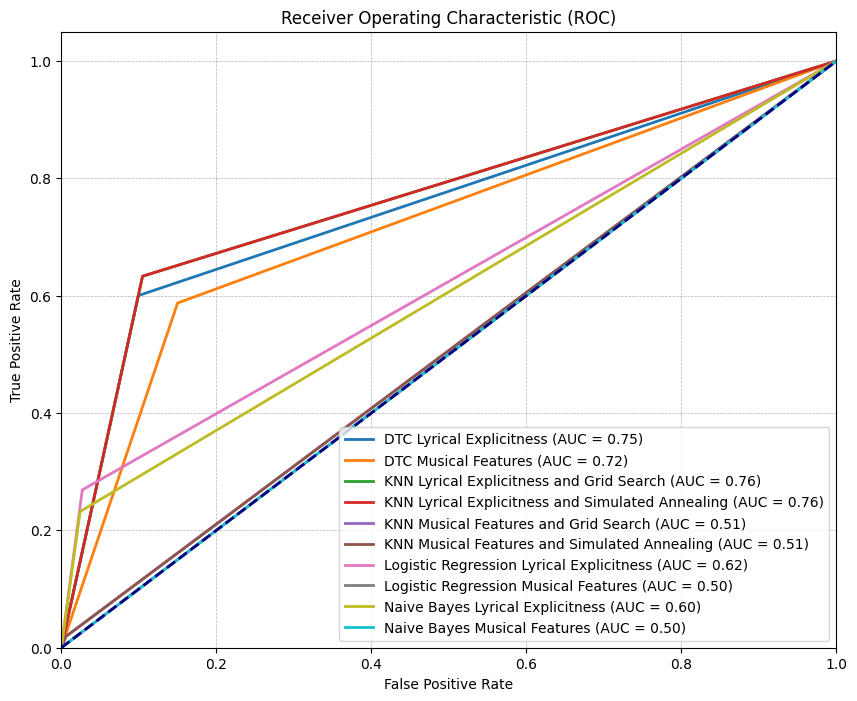

In [43]:
def plot_combined_roc_curves(confusion_matrices, labels):
    """
    Function to plot multiple ROC curves based on a list of confusion matrices on the same graph.
    Assumes binary classification problems.

    Parameters:
    - confusion_matrices: List of confusion matrices in the form of 2x2 numpy arrays.
    - labels: Labels for each confusion matrix to distinguish them in the plot.

    Returns:
    - A matplotlib plot of the ROC curves and prints the AUC scores.
    """
    plt.figure(figsize=(10, 8))
    for cm, label in zip(confusion_matrices, labels):
        tpr = cm[1, 1] / (cm[1, 1] + cm[1, 0])
        fpr = cm[0, 1] / (cm[0, 1] + cm[0, 0])

        roc_auc = auc([0, fpr, 1], [0, tpr, 1])
        plt.plot([0, fpr, 1], [0, tpr, 1], lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.show()

cms = [np.array([[1992, 220], [315, 473]]), np.array([[1880, 332], [325, 463]]),
        np.array([[1980, 232], [289, 499]]), np.array([[1980, 232], [289, 499]]),
            np.array([[2152, 60], [576, 212]]),]
titles = ['DTC Lyrical Explicitness', 'DTC Musical Features',
           'KNN Lyrical Explicitness and Grid Search','KNN Lyrical Explicitness and Simulated Annealing',
           'Logistic Regression Lyrical Explicitness',]

plot_combined_roc_curves(cms, titles)